<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/h_Jiyun/Chapter11_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import statsmodels.api as sm

In [2]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

# let's have a look
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## [Problem 11-1]

[그림 11-4] 재현

In [3]:
# binarize the seasons
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)

# Create a design matrix
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

# extract DV
y = data[['Rented Bike Count']].to_numpy()

# run the regression
beta = np.linalg.lstsq(desmat,y,rcond=None)

<ipython-input-3-2c2b7df49e66>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)


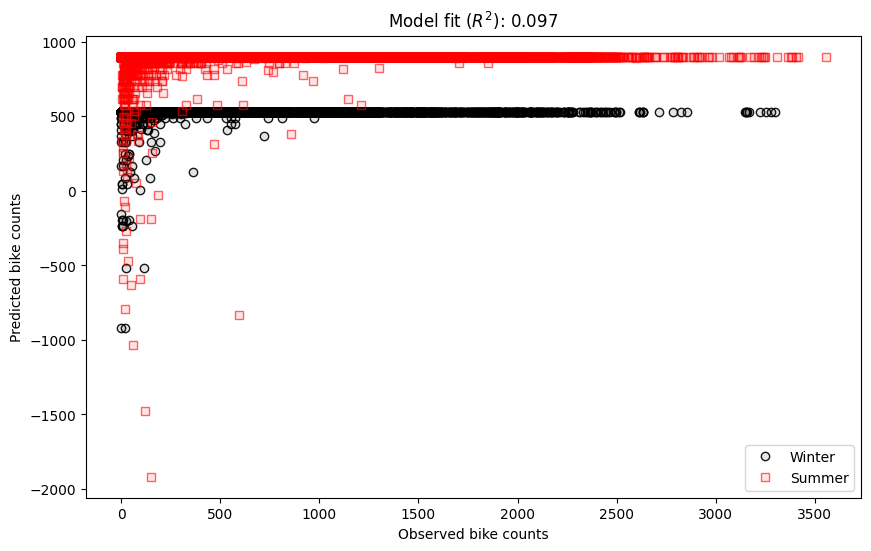

In [4]:
## plot some results.

# predicted data
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2


# and plot
plt.figure(figsize=(10,6))
plt.plot(y[desmat[:,1]==0],yHat[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[desmat[:,1]==1],yHat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.savefig('Figure_11_04.png',dpi=300)
plt.show()

자전거 대여량이 음수인 문제를 강우량이 **0이 아닌 데이터 행**에 대해서 반복함으로써 일부 완화


In [5]:
# re-create design matrix and data vector
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

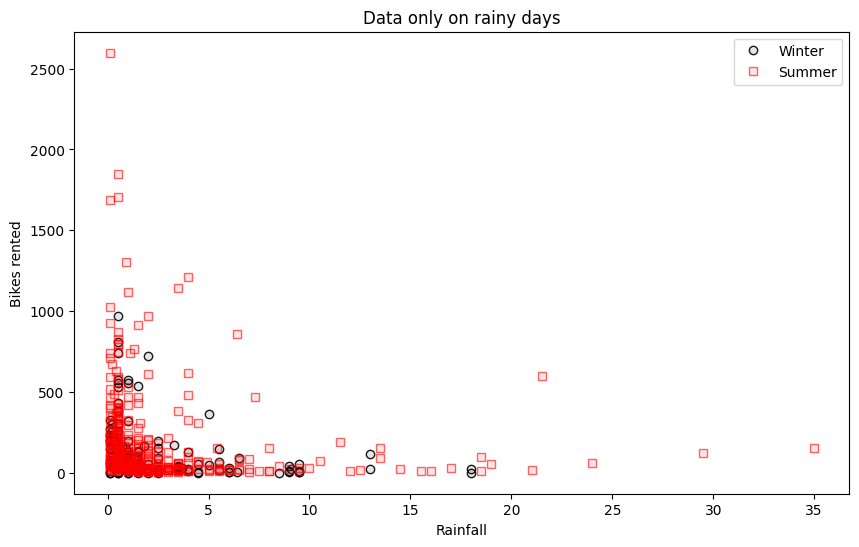

In [6]:
# repeat excluding zeros in rainfall

desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

# plot the data
plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

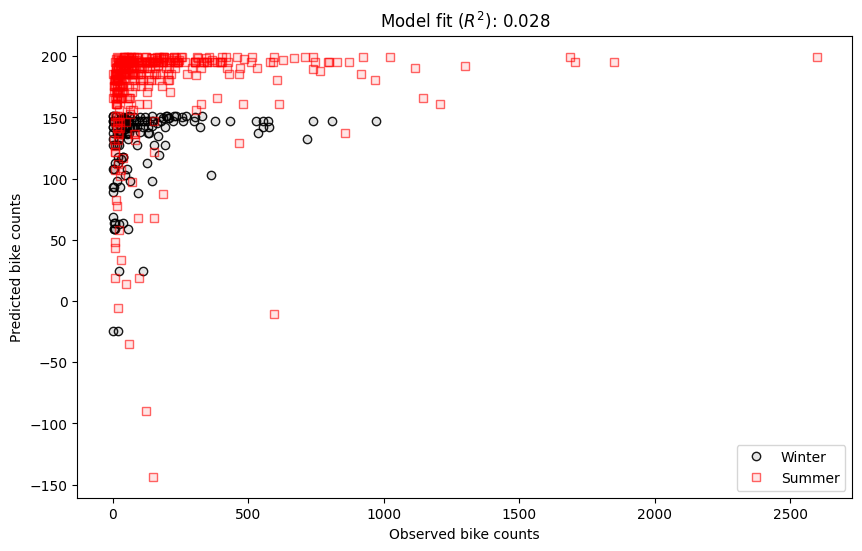

In [7]:
# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.show()

> 오잉 $R^2$ 값이 낮아졌다

## [Problem 11-2]

이분화된 계절이 자전거 대여량 예측에서 민감도가 부족할 수 있다는 문제점
*e.g. 가을에 따뜻하고 화창한 날, 봄에 춥고 비가 오는 날*

**온도를 독립변수로 변경**

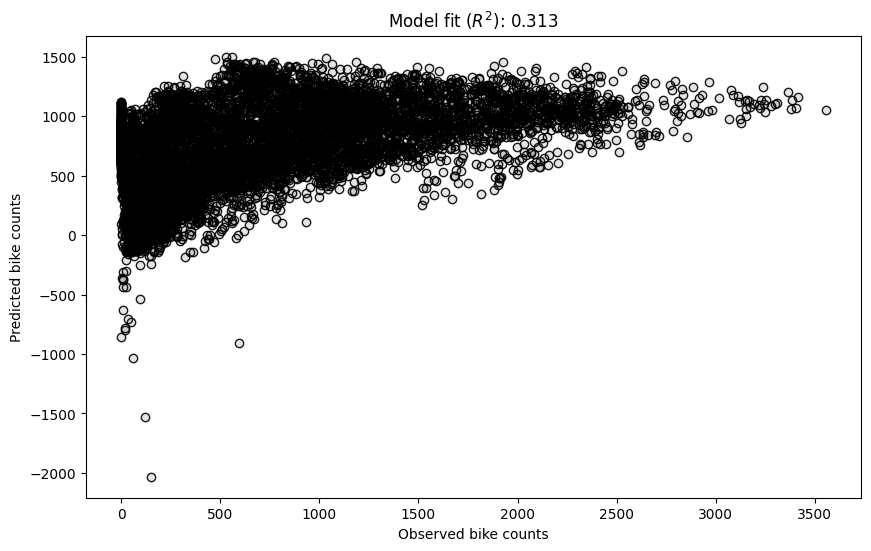

In [8]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)


beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.savefig('Figure_11_09.png',dpi=300)
plt.show()

> 여전히 음의 임대료를 예측하는 데 문제가 있지만 $R^2$가 더 높고 예측 결과가 질적으로 좋아짐

##[Problem 11-3]

In [9]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

# correlation matrix (note: nan's for intercept b/c no variance)
oSettings = np.seterr() # default error handling
np.seterr(all='ignore') # ignore warnings for correlation matrices
print(f'\nDesign matrix correlation matrix:')
print(np.round(np.corrcoef(desmatM.T),5))
np.seterr(**oSettings); # reset the error handling

Design matrix size: (8760, 4)
Design matrix rank: 3

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [10]:
# A nicer way to print out the correlation matrix using pandas
pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [11]:
### using left-inverse

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(desmatM.T@desmatM) @ desmatM.T
# FYI, numpy knowingly "inverts" a singular matrix if it's within precision: https://github.com/numpy/numpy/issues/2074

# solve for the coefficients and compute R^2
beta1 = X_leftinv @ y
yHat  = desmatM@beta1

# model fit to data (R^2)
modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.10306927861230561


In [12]:
### using numpy's least-squares

# fit the model
beta2 = np.linalg.lstsq(desmatM,y,rcond=None)
yHat  = desmatM@beta2[0]

# model fit to data (R^2)
modelfit2 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit2)

0.3126481542486898


In [13]:
### using statsmodels

# extract data (staying with pandas dataframes)
obsdata_df = data['Rented Bike Count']

# convert the design matrix into a pandas dataframe
desmat_df = pd.DataFrame(desmatM)

# create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()


beta3 = model.params.values
modelfit3 = model.rsquared

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


In [14]:
# print all to compare

print('MODEL FIT TO DATA:')
print(f'  Left-inverse: {modelfit1:.4f}')
print(f'  np lstsqr   : {modelfit2:.4f}')
print(f'  statsmodels : {modelfit3:.4f}')

print(' ')
print('BETA COEFFICIENTS:')
print(f'  Left-inverse: {np.round(beta1.T,3)}')
print(f'  np lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

MODEL FIT TO DATA:
  Left-inverse: 0.1031
  np lstsqr   : 0.3126
  statsmodels : 0.3126
 
BETA COEFFICIENTS:
  Left-inverse: [[-1.67070e+03 -1.12200e+00  3.37483e+02  1.17151e+02]]
  np lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


##[Problem 11-4]

$\gamma$ = 0 and $\gamma$ = .01

In [15]:
I = np.identity((desmatM.T@desmatM).shape[0])
# gamma = 0.0
leftinv0 = np.linalg.inv(desmatM.T@desmatM + 0.0*np.linalg.norm(desmatM)*I)
# gamma = 0.01
leftinv1 = np.linalg.inv(desmatM.T@desmatM + 0.01*np.linalg.norm(desmatM)*I)

print(f"inv(X'X + 0.0*I) size: {leftinv0.shape}")
print(f"inv(X'X + 0.0*I) rank: {np.linalg.matrix_rank(leftinv0)}")
print(f"inv(X'X + 0.01*I) size: {leftinv1.shape}")
print(f"inv(X'X + 0.01*I) rank: {np.linalg.matrix_rank(leftinv1)}")

inv(X'X + 0.0*I) size: (4, 4)
inv(X'X + 0.0*I) rank: 2
inv(X'X + 0.01*I) size: (4, 4)
inv(X'X + 0.01*I) rank: 4


In [28]:
## 다중공선성이 없는 설계 행렬

desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

## 다중공선성이 있는 설계 행렬

# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

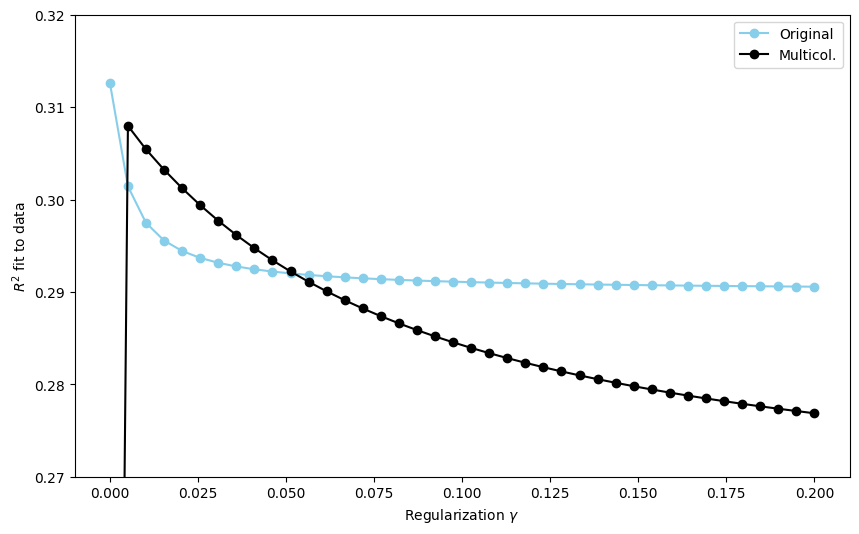

In [36]:
gs = np.linspace(0,.2,40)
I = np.identity((desmat.T@desmat).shape[0])
IM = np.identity((desmatM.T@desmatM).shape[0])
modelfit  = np.zeros(gs.shape)
modelfitM = np.zeros(gs.shape)

for i in range(len(gs)):
  leftinv = np.linalg.inv(desmat.T@desmat + gs[i]*np.linalg.norm(desmat)**2*I)
  leftinvM = np.linalg.inv(desmatM.T@desmatM + gs[i]*np.linalg.norm(desmatM)**2*IM)

  beta = leftinv@desmat.T@y
  betaM = leftinvM@desmatM.T@y

  yHat = desmat@beta
  yHatM = desmatM@betaM

  modelfit[i] = np.corrcoef(y.T,yHat.T)[0,1]**2
  modelfitM[i] = np.corrcoef(y.T,yHatM.T)[0,1]**2

plt.figure(figsize=(10,6))
plt.plot(gs, modelfit, 'o-', color='skyblue', label='Original')
plt.plot(gs, modelfitM, 'o-', color='black', label='Multicol.')
plt.ylim(0.27, 0.32)
plt.yticks(np.arange(0.27, 0.33, 0.01))
plt.xlabel('Regularization $\gamma$')
plt.ylabel('$R^2$ fit to data')
plt.legend()
plt.show()

## [Problem 11-5]

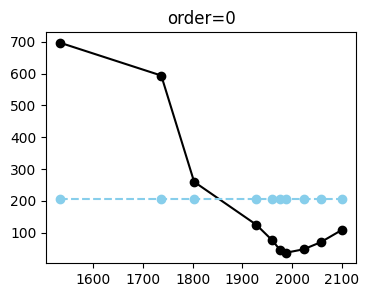

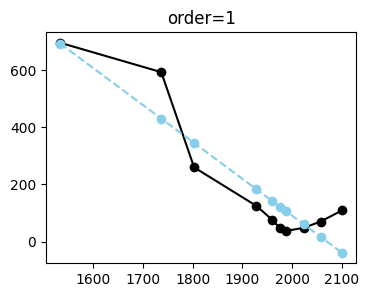

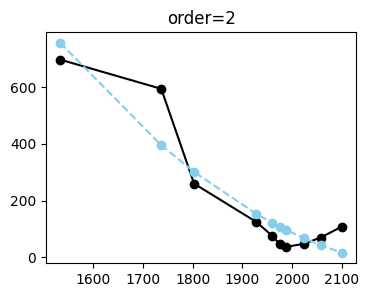

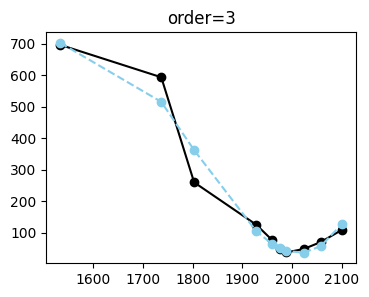

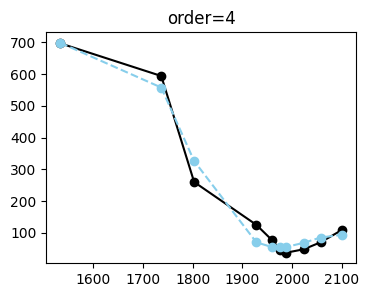

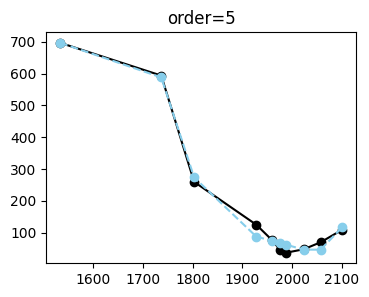

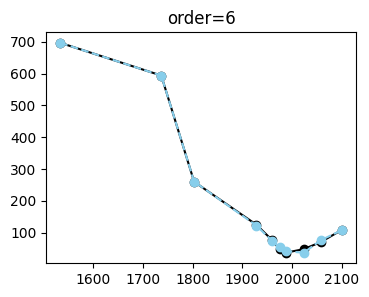

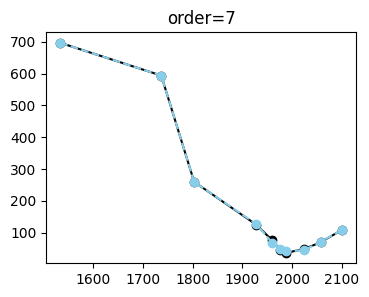

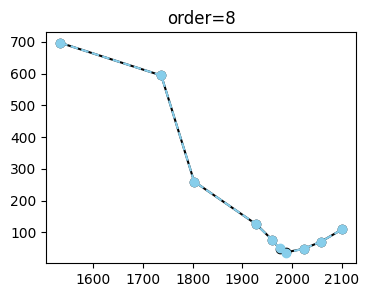

<ipython-input-67-7bd33158f247>:9: RankWarning: Polyfit may be poorly conditioned
  beta = np.polyfit(year,doubleTime,i)


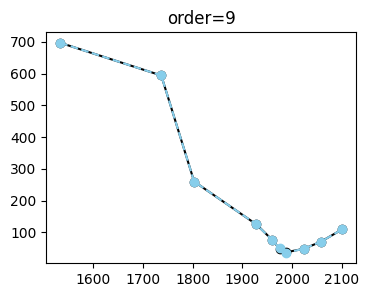

In [67]:
# data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

y = doubleTime


for i in range(0,10):
  beta = np.polyfit(year,doubleTime,i)
  yHat = np.polyval(beta, year)

  plt.figure(figsize=(4,3))
  plt.plot(year, yHat, 'o--', color='skyblue', zorder=10)
  plt.plot(year, y, 'o-', color='black')
  plt.title(f'order={i}')
  plt.show()

> *그래프 (2,5)로 나열하는 법은 모르겠다 헤헤*